In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
img = cv2.imread("./photos/virat_kohli/download (5).jpeg")
img.shape

(183, 275, 3)

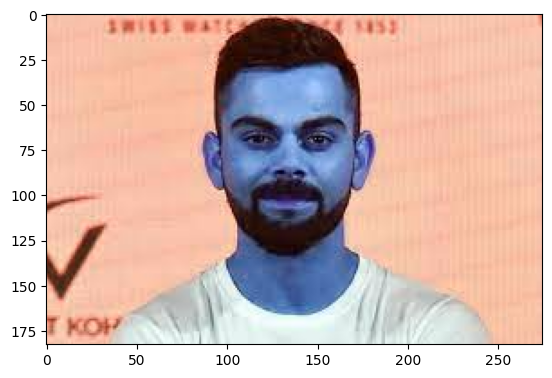

In [84]:
plt.imshow(img)

#### removing 3rd dim 

In [85]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

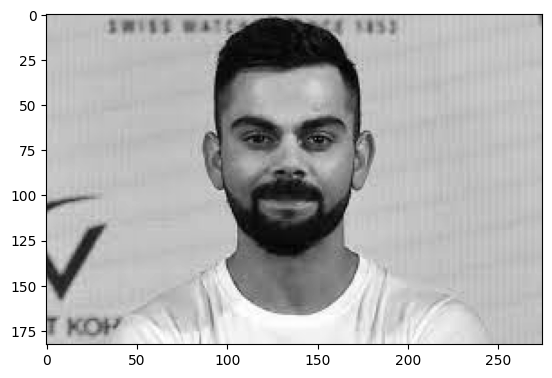

In [86]:
plt.imshow(gray , cmap='gray')

In [87]:
gray

array([[187, 191, 195, ..., 186, 155, 127],
       [187, 192, 195, ..., 182, 151, 122],
       [187, 192, 196, ..., 183, 153, 126],
       ...,
       [201, 203, 204, ..., 195, 195, 195],
       [197, 199, 200, ..., 194, 194, 194],
       [194, 193, 192, ..., 191, 191, 191]], dtype=uint8)

In [88]:
face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray ,1.3 ,5)
faces

array([[ 83,  28, 102, 102]])

In [89]:
x,y,w,h = faces[0]

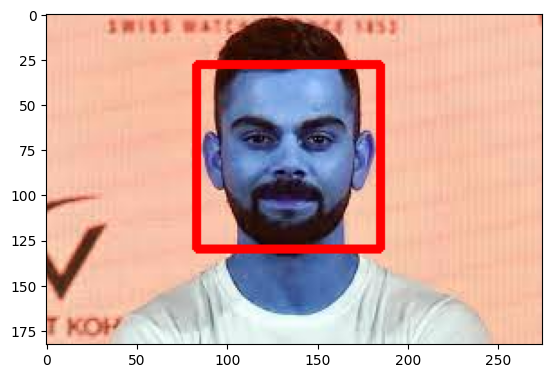

In [90]:
face_img = cv2.rectangle(img , (x,y) ,(x+w,y+h) , (255,0,0) , 4)
plt.imshow(face_img)

#### track eyes and face

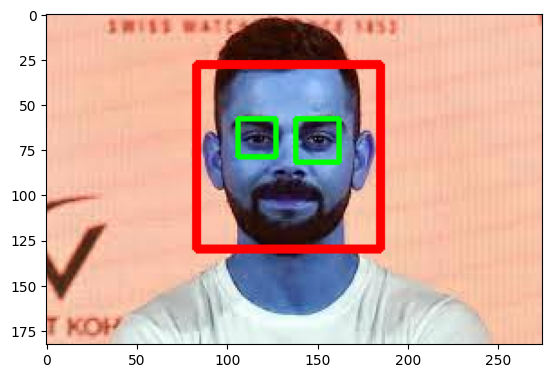

In [91]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img , (x,y) ,(x+w,y+h) , (255,0,0) )
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = face_img[y:y+h , x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color , (ex,ey), (ex+ew,ey+eh) ,(0,255,0) , 2)
plt.figure()
plt.imshow(face_img , cmap='gray')
plt.show()

#### crop face

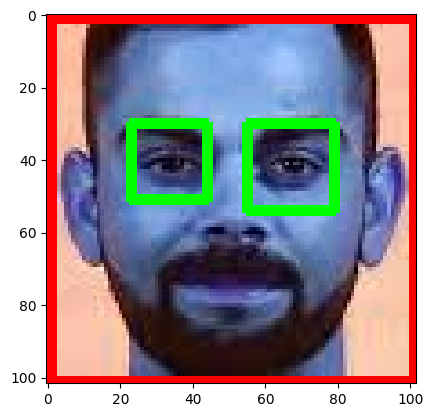

In [92]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

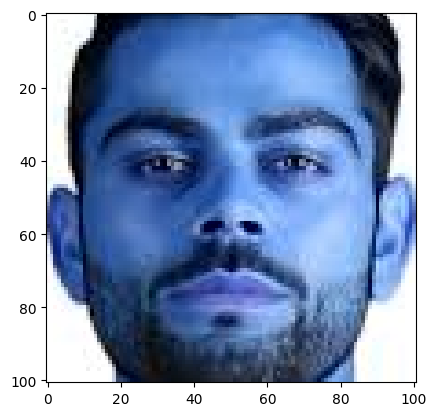

In [93]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray , 1.3 ,5)
    for (x,y,h,w) in faces :
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
cropped_img = get_cropped_image_if_2_eyes("./photos/virat_kohli/images (4).jpeg")
plt.imshow(cropped_img)

#### create a folder of celebrities and store a croped photos inside folfer

In [94]:
path_to_data="./photos/"
path_to_cr_data="./photos/cropped/"
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path) 

In [95]:
img_dirs

['./photos/anushka_sharma', './photos/lionel_messi', './photos/virat_kohli']

In [96]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)

In [97]:
img_dirs

['./photos/anushka_sharma', './photos/lionel_messi', './photos/virat_kohli']

In [98]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

anushka_sharma
Generating cropped images in folder:  ./photos/cropped/anushka_sharma
lionel_messi
Generating cropped images in folder:  ./photos/cropped/lionel_messi
virat_kohli
Generating cropped images in folder:  ./photos/cropped/virat_kohli


In [99]:
celebrity_file_names_dict

{'anushka_sharma': ['./photos/cropped/anushka_sharma/anushka_sharma1.png',
  './photos/cropped/anushka_sharma/anushka_sharma2.png',
  './photos/cropped/anushka_sharma/anushka_sharma3.png',
  './photos/cropped/anushka_sharma/anushka_sharma4.png',
  './photos/cropped/anushka_sharma/anushka_sharma5.png',
  './photos/cropped/anushka_sharma/anushka_sharma6.png',
  './photos/cropped/anushka_sharma/anushka_sharma7.png',
  './photos/cropped/anushka_sharma/anushka_sharma8.png',
  './photos/cropped/anushka_sharma/anushka_sharma9.png',
  './photos/cropped/anushka_sharma/anushka_sharma10.png',
  './photos/cropped/anushka_sharma/anushka_sharma11.png',
  './photos/cropped/anushka_sharma/anushka_sharma12.png',
  './photos/cropped/anushka_sharma/anushka_sharma13.png',
  './photos/cropped/anushka_sharma/anushka_sharma14.png',
  './photos/cropped/anushka_sharma/anushka_sharma15.png',
  './photos/cropped/anushka_sharma/anushka_sharma16.png',
  './photos/cropped/anushka_sharma/anushka_sharma17.png',
  './

In [100]:
cropped_image_dirs

['./photos/cropped/anushka_sharma',
 './photos/cropped/lionel_messi',
 './photos/cropped/virat_kohli']

## Use wavelet transform as a feature for traning our model

### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [101]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

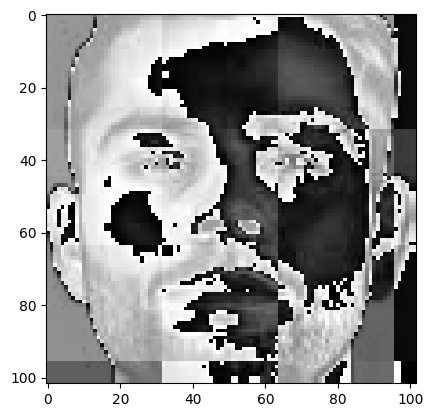

In [102]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [103]:
class_dic={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dic[celebrity_name]=count
    count=count+1
class_dic

{'anushka_sharma': 0, 'lionel_messi': 1, 'virat_kohli': 2}

In [104]:
X=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        scalled_raw_img = cv2.resize(img , (32,32))
        img_har = w2d(scalled_raw_img , 'db1' , 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dic[celebrity_name])


In [105]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(64, 4096)

### use SVM with rbf kernel tuned with heuristic finetuning

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.875

In [108]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.86      0.86      0.86         7
           2       0.83      0.83      0.83         6

    accuracy                           0.88        16
   macro avg       0.90      0.90      0.90        16
weighted avg       0.88      0.88      0.88        16



### Grid search CV

In [109]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [110]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [111]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.873333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.771111,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.851111,{'logisticregression__C': 1}


#### After above conclusion logistic and svm is best performer

In [112]:
best_clf = best_estimators['svm']
import joblib
joblib.dump(best_clf,'save_model.pkl')

['save_model.pkl']

In [113]:
class_dic

{'anushka_sharma': 0, 'lionel_messi': 1, 'virat_kohli': 2}

In [114]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dic))